<a href="https://colab.research.google.com/github/alperbozoglu/breastCancerModel/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix,accuracy_score

In [78]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
df_numeric = df.drop(columns=["Class"])
df_numeric.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [10]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [11]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [12]:
Class_val_counts = df["Class"].value_counts()
Class_val_counts

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

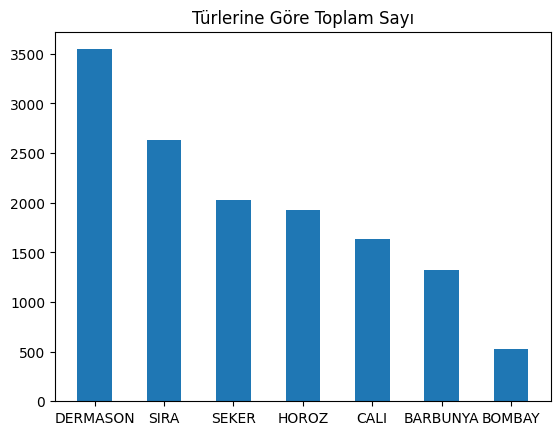

In [13]:
plt.title("Türlerine Göre Toplam Sayı")
x = Class_val_counts.index
y = Class_val_counts

plt.bar(x, y,  width = 0.5)
plt.show()

In [154]:
mm = MinMaxScaler()
df[["Area","ConvexArea","EquivDiameter","MajorAxisLength","Perimeter","MinorAxisLength"]] = mm.fit_transform(df[["Area","ConvexArea","EquivDiameter","MajorAxisLength","Perimeter","MinorAxisLength"]])
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.033107,0.070804,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.034991,0.073577,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.037126,0.078816,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [155]:
X_sample = df.drop(columns=["Class"])
y_sample = df["Class"]

y_sample.head(3)

0    SEKER
1    SEKER
2    SEKER
Name: Class, dtype: object

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size= 0.20, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(8166, 14)
(2723, 14)
(2722, 14)


In [90]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.87      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.94      0.91       317
    DERMASON       0.90      0.90      0.90       671
       HOROZ       0.97      0.93      0.95       408
       SEKER       0.95      0.94      0.94       413
        SIRA       0.84      0.87      0.86       536

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [162]:
X_sample = df.drop(columns=["Class","ConvexArea","EquivDiameter"])
y_sample = df["Class"]

X_sample.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066


In [53]:
"""
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size= 0.15, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.18, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
"""

(9486, 15)
(2042, 15)
(2083, 15)


In [97]:
for i in range(1,20,2):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  print(f"{i} => {model.score(X_val,y_val)}")
y_test_pred = model.predict(X_test)

print(classification_report(y_test,y_test_pred))
#n_neigbors 15 optimal

1 => 0.8886847905951506
3 => 0.9015429831006613
5 => 0.9110947832476121
7 => 0.9155033063923586
9 => 0.9147685525349009
11 => 0.914401175606172
13 => 0.914033798677443
15 => 0.9099926524614255
17 => 0.9132990448199853
19 => 0.9125642909625276
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.84      0.88       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.87      0.94      0.91       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.93      0.95       408
       SEKER       0.96      0.95      0.95       413
        SIRA       0.85      0.87      0.86       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



##Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(X_train.shape)

0.9041498347410943
(8166, 16)


In [99]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.85      0.81      0.83       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.87      0.90      0.89       317
    DERMASON       0.93      0.87      0.90       671
       HOROZ       0.96      0.96      0.96       408
       SEKER       0.94      0.95      0.95       413
        SIRA       0.83      0.90      0.86       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723



##Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state = 84)
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(X_train.shape)

0.9221446933529196
(8166, 14)


In [138]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.95      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.87      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [129]:
from sklearn.svm import SVC
model = SVC(gamma=50)
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9225119353654058

In [130]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.90      0.95      0.92       317
    DERMASON       0.91      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.89      0.88       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



#Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",splitter="best", random_state = 84)
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8975394785163423

In [134]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.88      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.90      0.92      0.91       317
    DERMASON       0.87      0.89      0.88       671
       HOROZ       0.96      0.93      0.95       408
       SEKER       0.96      0.91      0.93       413
        SIRA       0.82      0.84      0.83       536

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [135]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42, max_iter=1000, solver = "newton-cg")
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9045170767535806

In [136]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.80      0.86       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.88      0.93      0.90       317
    DERMASON       0.89      0.90      0.90       671
       HOROZ       0.97      0.94      0.96       408
       SEKER       0.93      0.93      0.93       413
        SIRA       0.84      0.87      0.85       536

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723

